In [95]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

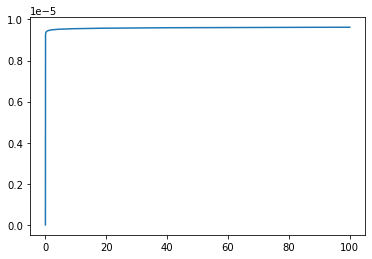

In [102]:
q=72                                      #number of surface capsomers
Ccmc=0.2e-6                                 #critical concentration,mole
alpha=2                                     #line energy, kT 
beta=70e6                                   #rate of attachment, Hz/meter
c1t0=10.0e-6                                #initial concentration, mole
Rh=0.619e-6                                 #hydrodynamic radius, meter, estimated for 300 amino acid protein
R=np.sqrt(q)*Rh/2                           #estimate for spherical capsid radius
T=293                                       #room temp, K
k=1.38064852e-23                            #boltzmann constant
Z= 0.9544e-3                                #viscosity room temp water, pascals
D1=k*T/(6*np.pi*Rh*Z)                       #diffusion coefficient
j=D1*2*R/q                                  #simplification constant

initCn=[0]*q                                #empty conditions
initCn[0]=c1t0                              #adding initial concentration of subunits

t=np.linspace(0,100,10001)                    #time values

def Jn(n,C1,Cn,Cnp1):                       #Net current of partial capdisds of size n growing to n+1
    J=beta*Cn-beta*Cnp1*Ccmc/(C1*2)*np.exp(alpha*(np.sqrt((n+1)*(q-n-1))-np.sqrt(n*(q-n))))
    return(J)

dcdt=[0]                                    #initializes dcdt

def Con(Cn,t):                              #function builds dcdt ode list of size q                                       #dummy index
    dcdt=[0]*q                              #intializes q size list of zeros
    i=0                                     #dummy index
    while i < q:                            #0 to q-1 indices fills in list 
        n=i+1                               #number of capsomers is index+1
        if i == 0:                          #first list element index 0
            dcdt[0]=-Jn(1,Cn[0],Cn[0],Cn[1])
        elif n == q:                        #final list element index q-1
            dcdt[i]=Jn(i,Cn[0],Cn[i-1],Cn[i])
        else:                               #elements of index 1 to q-2
            dcdt[i]=Jn(i,Cn[0],Cn[i-1],Cn[i])-Jn(n,Cn[0],Cn[i],Cn[n])
        i+=1
    return(dcdt)
x=odeint(Con,initCn,t)                      #integratesgives txq matrix of concetrations at each time step

Cq= x[:,q-1]                                #concentration of complete capsids as a function of time

plt.plot(t,Cq)
plt.show()